<a href="https://colab.research.google.com/github/Tejaswi-Jadhav-2002/Tejaswi-Jadhav-2002/blob/main/ML_Project_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load Dataset
df = pd.read_csv("Data_file.csv")

In [4]:
# Display first few rows
display(df.head())


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [5]:
# Exploratory Data Analysis (EDA)
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB
None
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532    

In [6]:
# Handling missing values
df.dropna(inplace=True)  # Drop rows with missing values


In [7]:
# Encoding categorical variables if any
if "ocean_proximity" in df.columns:
    df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)

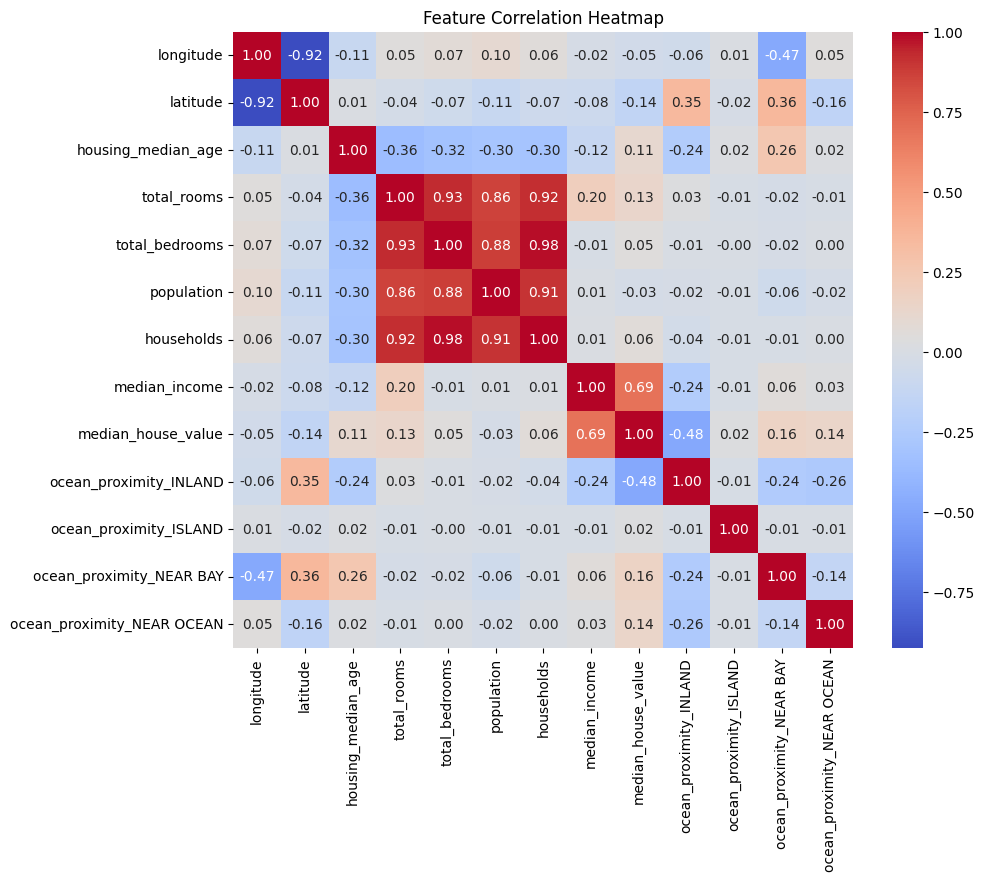

In [8]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [9]:
# Splitting features and target variable
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Simple Linear Regression (using median income as predictor)
lr_simple = LinearRegression()
lr_simple.fit(X_train[["median_income"]], y_train)

# Predictions
y_pred_simple = lr_simple.predict(X_test[["median_income"]])


In [12]:
# Model Evaluation
print("Simple Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_simple))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_simple)))
print("R2 Score:", r2_score(y_test, y_pred_simple))


Simple Linear Regression:
MSE: 7221011204.235033
RMSE: 84976.53325615863
R2 Score: 0.47196228574894983


In [13]:
# Multiple Linear Regression
lr_multiple = LinearRegression()
lr_multiple.fit(X_train, y_train)

# Predictions
y_pred_multiple = lr_multiple.predict(X_test)


In [14]:
# Model Evaluation
print("\nMultiple Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_multiple))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_multiple)))
print("R2 Score:", r2_score(y_test, y_pred_multiple))



Multiple Linear Regression:
MSE: 4802173538.60416
RMSE: 69297.7166911303
R2 Score: 0.6488402154431994


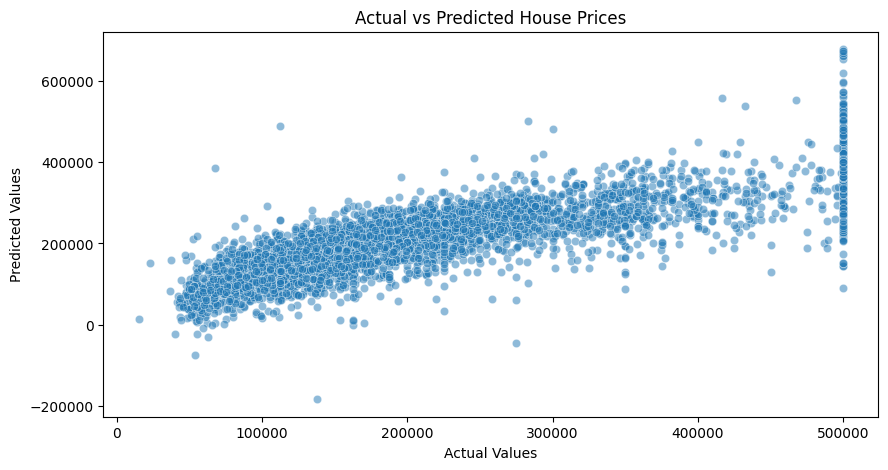

In [15]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred_multiple, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [16]:
# Save the final model
import joblib
joblib.dump(lr_multiple, "final_model.pkl")


['final_model.pkl']